In [ ]:
import pandas as pd
import joblib 
import numpy as np
import pandas as pd

# โหลดโมเดล
try:
    clf = joblib.load('food_recommendation_model.pkl') 
    print("โหลดโมเดลสำเร็จ!")
except FileNotFoundError:
    print("ข้อผิดพลาด: ไม่พบไฟล์โมเดล 'your_trained_model.joblib'")
    print("กรุณาตรวจสอบว่าไฟล์โมเดลอยู่ในตำแหน่งที่ถูกต้อง หรือฝึกโมเดลใหม่")
    exit() 
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการโหลดโมเดล: {e}")
    exit()

# สร้างข้อมูลทดสอบใหม่ 

np.random.seed(42)  # ตั้งค่า seed เพื่อให้ผลลัพธ์ซ้ำได้

num_samples = 100

# สุ่มข้อมูลอายุ 20-80 ปี
ages = np.random.randint(20, 66, size=num_samples)

# สุ่มข้อมูลเพศ 0=หญิง, 1=ชาย
genders = np.random.choice([0, 1], size=num_samples)

# สุ่มส่วนสูง (cm) 150-185
heights = np.random.randint(150, 186, size=num_samples)

# สุ่มน้ำหนัก (kg) 50-100
weights = np.random.randint(50, 101, size=num_samples)

# คำนวณ BMI
bmi = np.round(weights / ((heights / 100) ** 2), 1)

# สุ่มโรค (Disease_Type) 0-7
disease_types = np.random.randint(0, 8, size=num_samples)

# สุ่มระดับกิจกรรม 1-4
activity_levels = np.random.randint(1, 3, size=num_samples)

# รวมเป็น DataFrame
new_test_data = pd.DataFrame({
    'Ages': ages,
    'Gender': genders,
    'Height': heights,
    'Weight': weights,
    'Bmi': bmi,
    'Disease_Type': disease_types,
    'Activity_Level': activity_levels
})
X_new_test = pd.DataFrame(new_test_data)

print("---------------------ชุดข้อมูลทดสอบใหม่----------------------")
print(X_new_test.count())
print(X_new_test)



# ทำนายผล 
try:
    new_y_pred_100 = clf.predict(X_new_test)  # เปลี่ยนตรงนี้ให้ตรงกับ DataFrame ที่ใช้จริง

    # เพิ่มคอลัมน์ผลการทำนายลงใน DataFrame
    X_new_test['Predicted_Food'] = new_y_pred_100

    # แสดงผลบางส่วนเพื่อความกระชับ
    print("-----------------ผลการทำนายอาหารสำหรับ 100 คน-----------------")
    print(X_new_test[['Ages', 'Gender', 'Height', 'Weight', 'Bmi', 'Disease_Type', 'Activity_Level', 'Predicted_Food']].head(10))
    print("แสดงผล 10 คนแรกจากทั้งหมด 100 คน")
    print("-------------------------------------------------------------")

except Exception as e:
    print(f"เกิดข้อผิดพลาดระหว่างการทำนายผล: {e}")
    print("โปรดตรวจสอบว่า feature names และรูปแบบข้อมูลตรงกับที่ใช้ในการฝึกโมเดล")




โหลดโมเดลสำเร็จ!
---------------------ชุดข้อมูลทดสอบใหม่----------------------
Ages              100
Gender            100
Height            100
Weight            100
Bmi               100
Disease_Type      100
Activity_Level    100
dtype: int64
    Ages  Gender  Height  Weight   Bmi  Disease_Type  Activity_Level
0     58       1     176      63  20.3             3               2
1     48       0     162      70  26.7             2               1
2     34       0     152      97  42.0             6               1
3     62       0     155      69  28.7             6               2
4     27       0     157      57  23.1             3               1
..   ...     ...     ...     ...   ...           ...             ...
95    63       0     165      50  18.4             4               2
96    27       1     185      57  16.7             6               2
97    43       0     182      95  28.7             2               1
98    30       0     153      65  27.8             3            


--------------------- Classification Report ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        11

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

--------------------- Confusion Matrix ----------------------


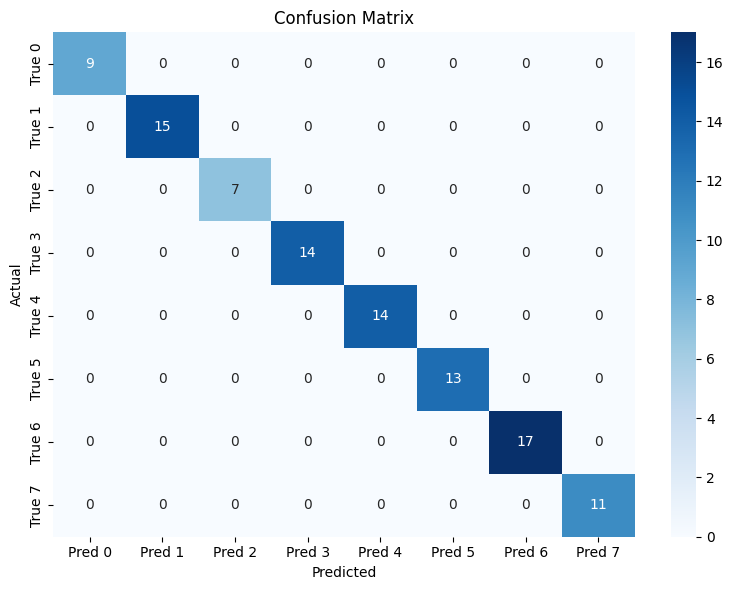

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง y_true จากคอลัมน์ Disease_Type
y_true = X_new_test['Disease_Type']
y_pred = new_y_pred_100  # ค่าที่ได้จากการ predict

print("\n--------------------- Classification Report ----------------------")
print(classification_report(y_true, y_pred, zero_division=0))

print("--------------------- Confusion Matrix ----------------------")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(8)],
            yticklabels=[f'True {i}' for i in range(8)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
